<a href="https://colab.research.google.com/github/jeraldflowers/Clustering-Scikit-learn/blob/main/Clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering with K-means


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparing Test Data

In [3]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [4]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)

In [7]:
df_centers =  pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)

## Data Display

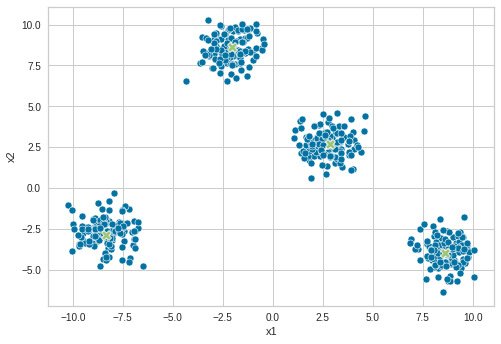

In [8]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.show()

## Applying K-means

In [12]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1': k_means_centers[:,0],
        'x2': k_means_centers[:,1]
    }
)

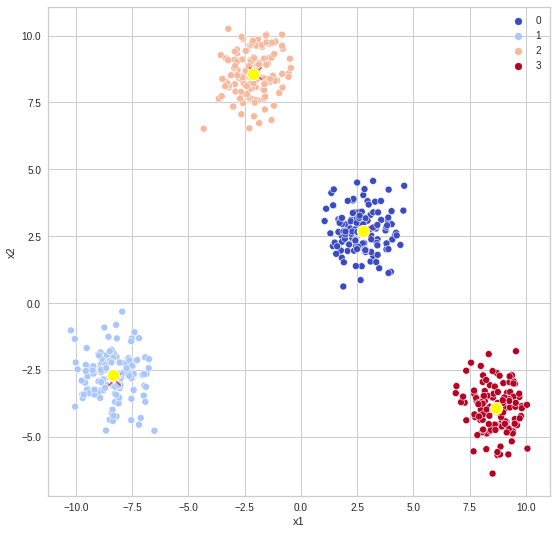

In [13]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='x', s=150, color='red')
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='o', s=150, color='yellow')
plt.show()

In [18]:
def vis_cluster(k):
  kmeans = KMeans(n_clusters=k)
  df_cluster = kmeans.fit_predict(X)
  df_blobs['cluster'] = df_cluster
  k_means_centers = kmeans.cluster_centers_
  df_k_means_center = pd.DataFrame(
      {
          'x1': k_means_centers[:,0],
          'x2': k_means_centers[:,1]
      }
  )

  fig = plt.figure(figsize=(9,9))
  sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
  sns.scatterplot(data=df_centers, x='x1', y='x2', marker='x', s=150, color='red')
  sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='o', s=150, color='yellow')
  plt.show()

3


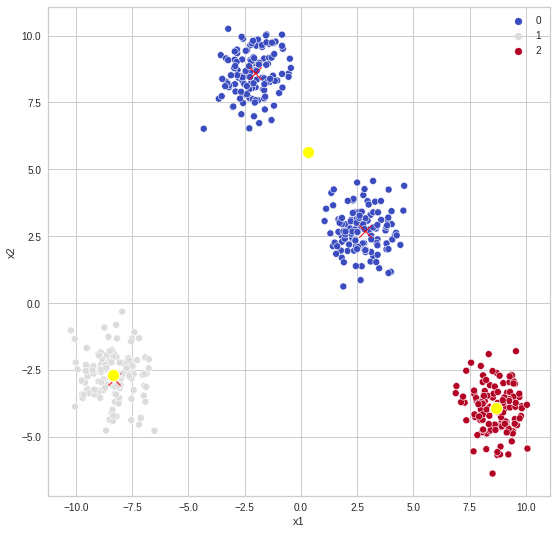

4


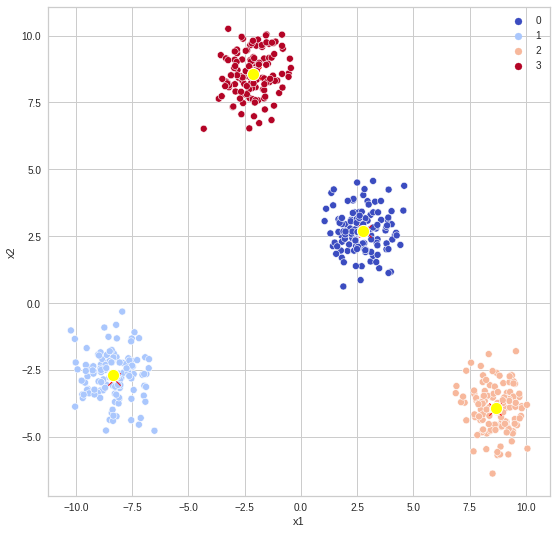

5


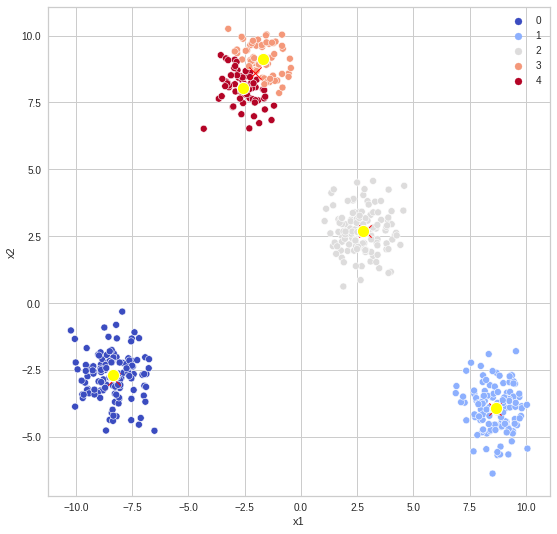

6


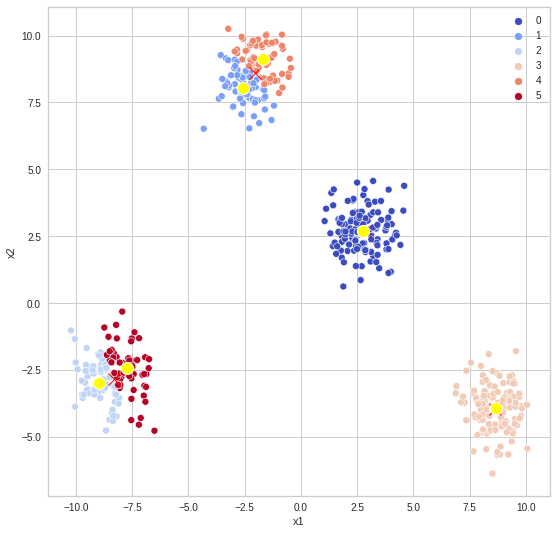

In [19]:
for _ in range(3,7):
  print(_)
  vis_cluster(_)


## Finding the value of K

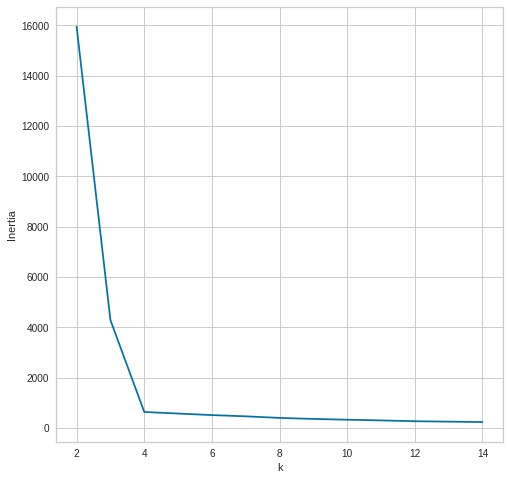

In [21]:
sum_of_squared_distances = []
K = range(2, 15)
for k in K :
  km = KMeans(n_clusters=k)
  km = km.fit(X)
  sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

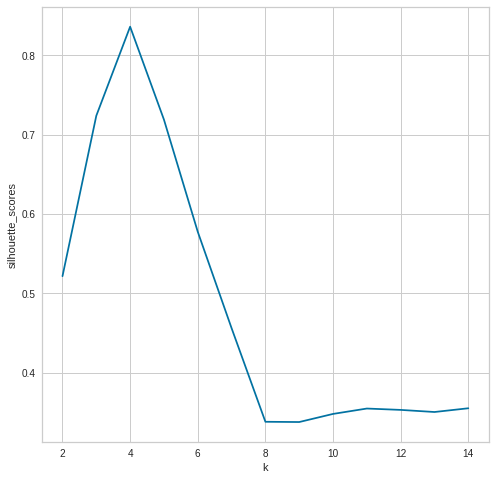

In [23]:
silhouette_scores = []
K = range(2, 15)
for k in K :
  km = KMeans(n_clusters=k)
  km = km.fit(X)
  y = km.predict(X)
  silhouette_scores.append(silhouette_score(X, y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.show()

## Evaluating clusters with K-means

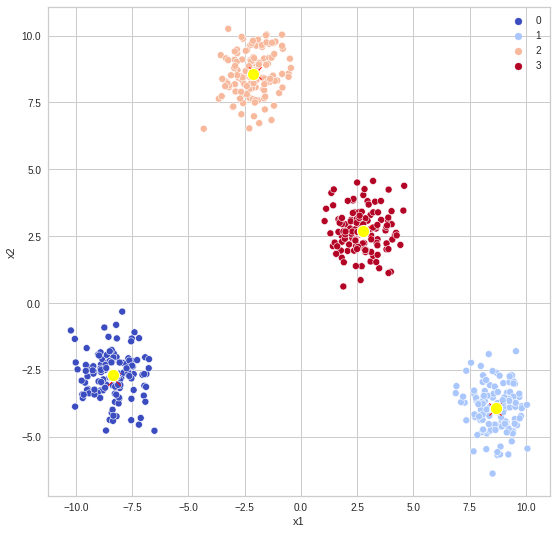

In [24]:
vis_cluster(4)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6f24aa2b0>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

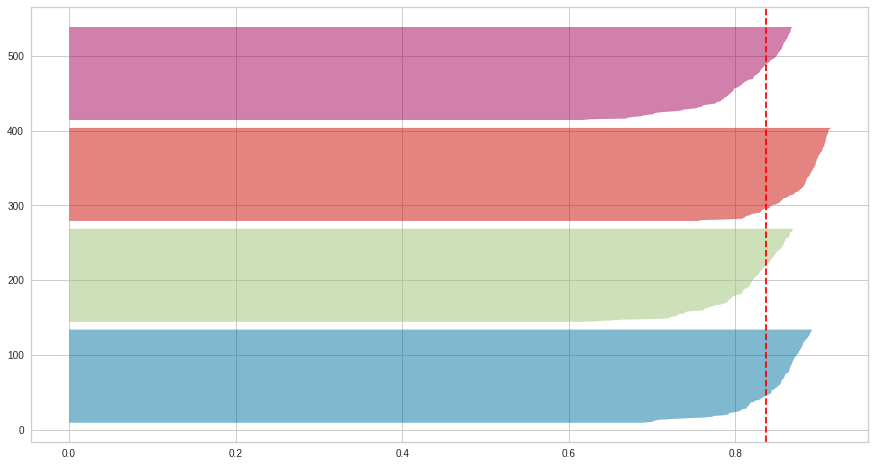

In [25]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)